In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

## Load datasets

In [2]:
df = pd.read_excel('datasets/Online Retail.xlsx')

In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


### **Penjelasan setiap baris**

setiap baris mewakili barang yang dibeli oleh customer, maka dari itu setiap stockCode memiliki nilai yang unik karena mewakili suatu barang.

**penjelasan kolom invoice No**
setiap transaksi dapat memiliki beberapa barang maka dari itu invoiceNo memiliki nilai yang duplikasi.

**penjelasan kolom description**
description merupakan barang yang dibeli oleh customer

**Penjelasan kolom quantity, InvoiceDate, UnitPrice, CustomerID, Country**

quantity : jumlah barang yang dibeli oleh customer

UnitPrice : merupakan harga barang yang dibeli oleh customer dalam bentuk dollar

CustomerID : merupakan nilai unik dari sebuah customer (ID)

Country : negara tempat tinggal customer

## checking for null values

In [4]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### Handling kolom **CustomerID**

terdapat banyakan customerid yang missing value, lebih baik dihapus karena artinya tidak ada customer

In [5]:
df = df.dropna(subset=['CustomerID'])

### Handling kolom **Description**

In [6]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Karena setiap description yang memiliki missing value terdapat customerid, maka kita tidak perlu menghapus baris yang memiliki missing value, karena sudah dijalankan pada saat handling kolom CustomerID

## Handling negative values

In [7]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303


dapat dilihat pada table diatas, quantity memiliki nilai minimal yang negatif serta terdapat unitPrice yang memiliki nilai minimum 0. seharusnya ini tidak terjadi pada saat melakukan transaksi. maka kita perlu menseleksi baris berdasarkan kondisi.

In [8]:
df = df[(df['Quantity']>0) & (df['UnitPrice']>0)] # melakukan seleksi baris

In [9]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397884.000000,397884,397884.000000,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,179.331775,NaN,22.097877,1713.141560


## Handling duplicate values

Kita perlu melakukan step ini agar mesin dapat mempelajari data secara variatif dan tidak duplikat

In [10]:
print("We have" , df.duplicated().sum(), "duplicates")

We have 5192 duplicates


mari kita lihat data apa saja yang terdapat duplikasi

In [11]:
df[df.duplicated()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom


In [12]:
df = df.drop_duplicates()

In [13]:
print("We now have" , df.duplicated().sum(), "duplicates")

We now have 0 duplicates


## EDA to understanding data

In [14]:
df_totalamount = df.copy()

# Calculate the total amount spent for each customer
df_totalamount['TotalAmount'] = df_totalamount['Quantity'] * df_totalamount['UnitPrice']
total_spent_by_customer = df_totalamount.groupby(['CustomerID', 'Country'])['TotalAmount'].sum()

# Sort the customers based on total amount spent in descending order
top_customers = total_spent_by_customer.sort_values(ascending=False)

# Get the top 5 customers
top_5_customers = top_customers.head(5)
# Convert the result to a DataFrame
top_5_customers_df = top_5_customers.reset_index()

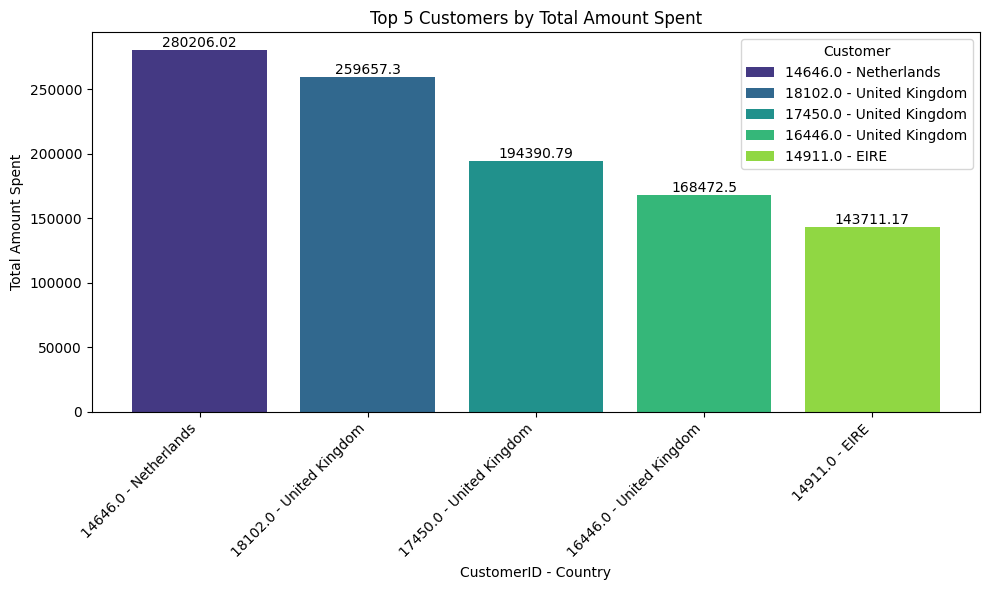

In [15]:
# Use seaborn's color palette
palette = sns.color_palette('viridis', n_colors=len(top_5_customers_df))

# Plot the bar chart with values inside the bars
plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_customers_df['CustomerID'].astype(str) + ' - ' + top_5_customers_df['Country'], top_5_customers_df['TotalAmount'], color=palette)

# Display the exact values inside the bars
for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('CustomerID - Country')
plt.ylabel('Total Amount Spent')
plt.title('Top 5 Customers by Total Amount Spent')
plt.xticks(rotation=45, ha='right')

# Add legend
legend_labels = top_5_customers_df['CustomerID'].astype(str) + ' - ' + top_5_customers_df['Country']
plt.legend(bars, legend_labels, title='Customer')

plt.tight_layout()
plt.show()

In [16]:
# Count the number of unique invoices for each customer
orders_by_customer = df.groupby(['CustomerID', 'Country']).size().reset_index(name='No of Orders')

# Sort the customers based on the number of orders in descending order
top_customers_with_most_orders = orders_by_customer.sort_values(by='No of Orders', ascending=False)

# Get the top 5 customers
top_5_customers_with_most_orders = top_customers_with_most_orders.head(5)

# Display the result
top_5_customers_with_most_orders

,CustomerID,Country,No of Orders
4018,17841.0,United Kingdom,7676
1887,14911.0,EIRE,5670
1297,14096.0,United Kingdom,5111
334,12748.0,United Kingdom,4412
1669,14606.0,United Kingdom,2677


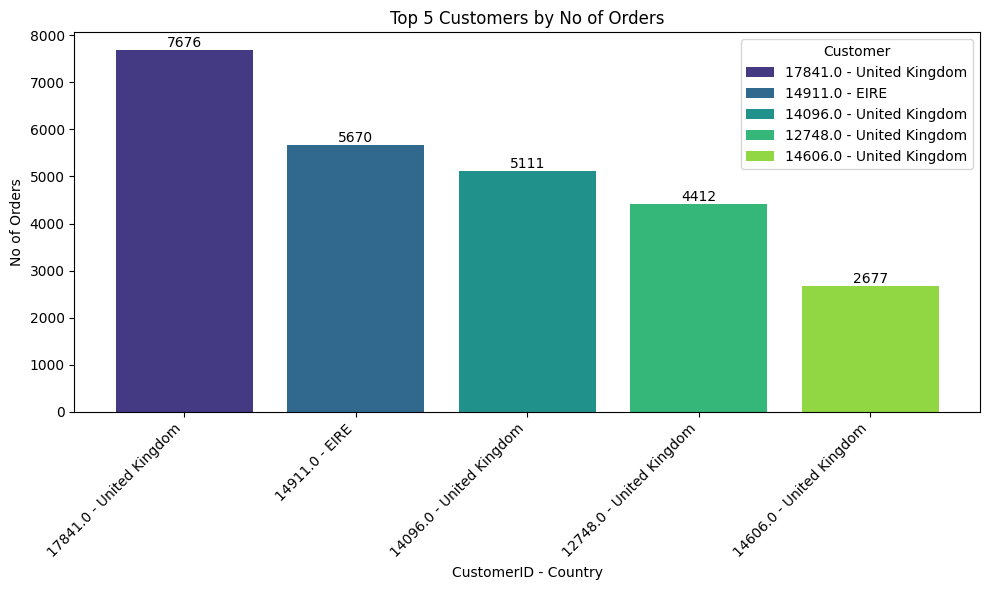

In [17]:
# Use seaborn's color palette
palette = sns.color_palette('viridis', n_colors=len(top_5_customers_with_most_orders))

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_customers_with_most_orders['CustomerID'].astype(str) + ' - ' + top_5_customers_with_most_orders['Country'], top_5_customers_with_most_orders['No of Orders'], color=palette)

# Display the exact values inside the bars
for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.xlabel('CustomerID - Country')
plt.ylabel('No of Orders')
plt.title('Top 5 Customers by No of Orders')
plt.xticks(rotation=45, ha='right')

# Add legend
legend_labels = top_5_customers_with_most_orders['CustomerID'].astype(str) + ' - ' + top_5_customers_with_most_orders['Country']
plt.legend(bars, legend_labels, title='Customer')

plt.tight_layout()
plt.show()

### Jumlah Order Setiap Bulan (Number of Orders Each Month):

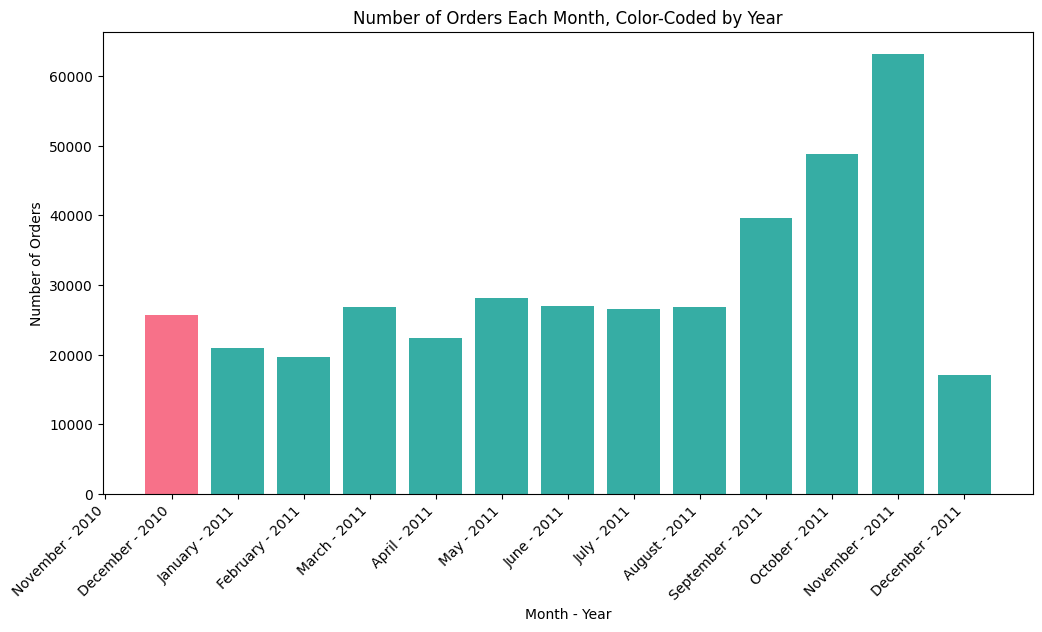

In [18]:
import calendar
# Convert 'InvoiceDate' to datetime format
df_order = df.copy()
df_order['InvoiceDate'] = pd.to_datetime(df_order['InvoiceDate'])

# Extract month and year from 'InvoiceDate'
df_order['Month'] = df_order['InvoiceDate'].dt.month
df_order['Month'] = df_order['Month'].apply(lambda x: calendar.month_name[x])
df_order['Year'] = df_order['InvoiceDate'].dt.year

# Create a categorical palette for each year
palette = sns.color_palette('husl', n_colors=df_order['Year'].nunique())
year_palette = dict(zip(sorted(df_order['Year'].unique()), palette))

# Plot the bar chart
plt.figure(figsize=(12, 6))

for year, color in year_palette.items():
    orders_by_month_year = df_order[df_order['Year'] == year].groupby(['Month']).size()
    orders_by_month_year = orders_by_month_year.reindex(calendar.month_name[1:])
    plt.bar(orders_by_month_year.index + f" - {year}", orders_by_month_year, color=color)

plt.xlabel('Month - Year')
plt.ylabel('Number of Orders')
plt.title('Number of Orders Each Month, Color-Coded by Year')
plt.xticks(rotation=45, ha='right')
plt.show()

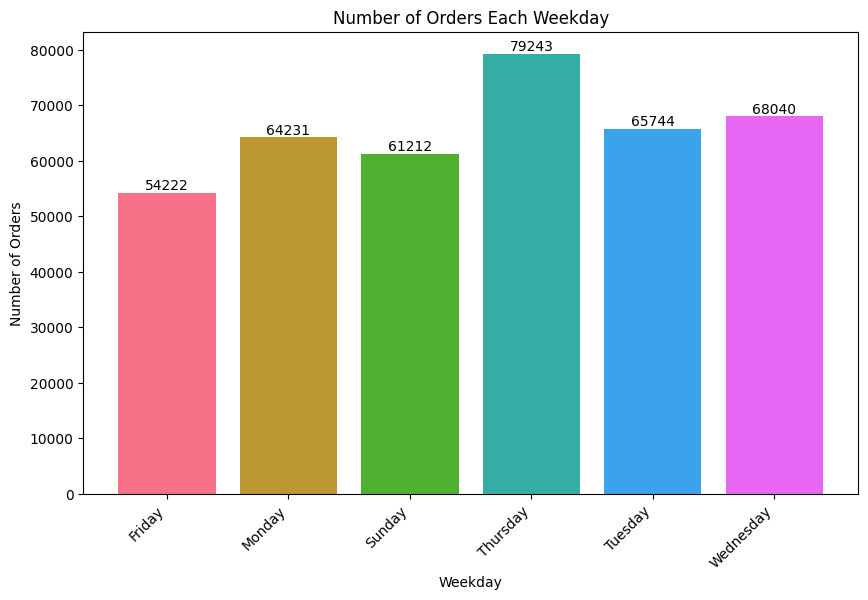

In [19]:
# Convert 'InvoiceDate' to datetime format
df_order['InvoiceDate'] = pd.to_datetime(df_order['InvoiceDate'])

# Extract weekday from 'InvoiceDate'
df_order['Weekday'] = df_order['InvoiceDate'].dt.day_name()

# Create a categorical palette for each weekday
palette = sns.color_palette('husl', n_colors=df_order['Weekday'].nunique())
weekday_palette = dict(zip(sorted(df_order['Weekday'].unique()), palette))

# Plot the bar chart
plt.figure(figsize=(10, 6))

for weekday, color in weekday_palette.items():
    orders_by_weekday = df_order[df_order['Weekday'] == weekday].groupby(['Weekday']).size()
    bars = plt.bar(orders_by_weekday.index, orders_by_weekday, color=color)

    # Display the exact values on each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.xlabel('Weekday')
plt.ylabel('Number of Orders')
plt.title('Number of Orders Each Weekday')
plt.xticks(rotation=45, ha='right')
plt.show()

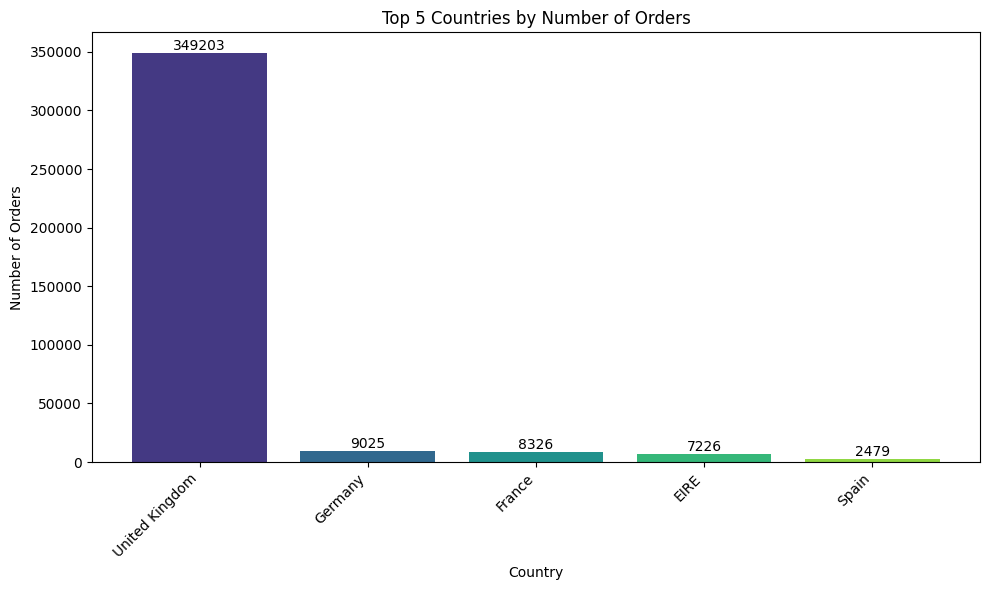

In [20]:
# Count the number of orders for each country
orders_by_country = df_order.groupby('Country').size()

# Sort countries based on the number of orders in descending order
orders_by_country = orders_by_country.sort_values(ascending=False)

# Get the top 5 countries
top_countries = orders_by_country.head(5)

# Use seaborn's color palette
palette = sns.color_palette('viridis', n_colors=len(top_countries))

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(top_countries.index, top_countries, color=palette)

# Display the exact values inside the bars
for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.xlabel('Country')
plt.ylabel('Number of Orders')
plt.title('Top 5 Countries by Number of Orders')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [21]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


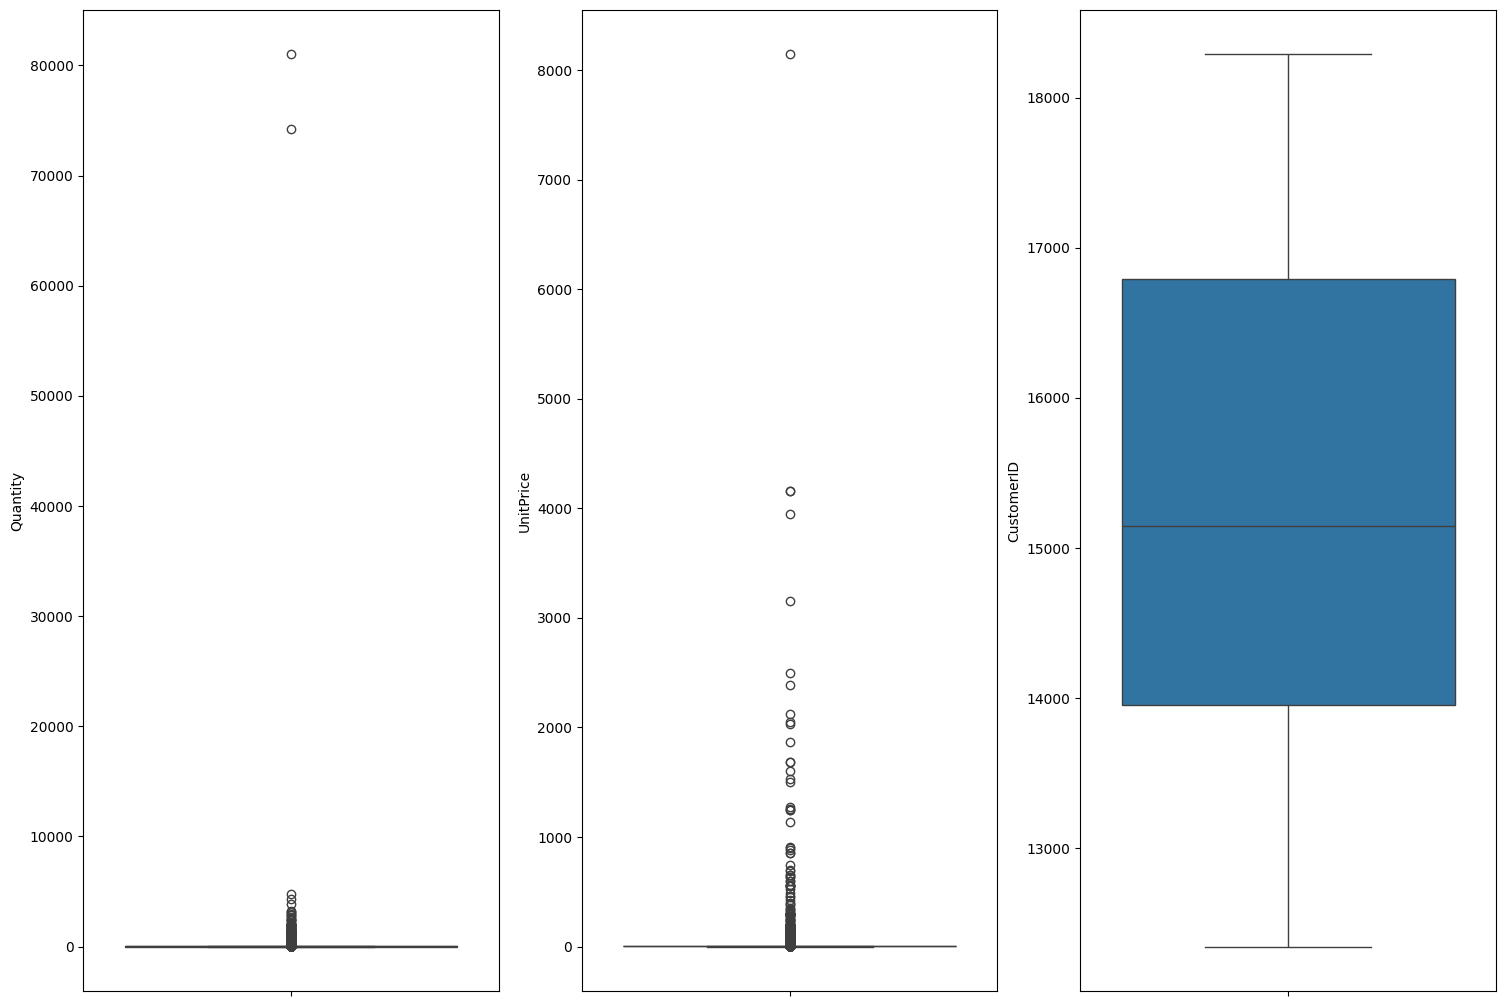

In [22]:
# Check Outliers kolom numerik
df_numerik = df.select_dtypes(include=[float, int]).columns

fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(15,10))
index = 0
ax = ax.flatten()

for kolom in df_numerik:
    sns.boxplot(y=kolom, data=df, ax=ax[index])
    index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


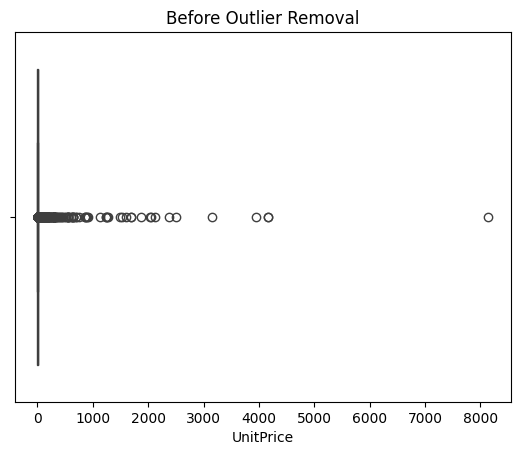

In [23]:
# plotting a box plot to find outliers in unit price
sns.boxplot(data = df, x = 'UnitPrice')
plt.title("Before Outlier Removal");

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


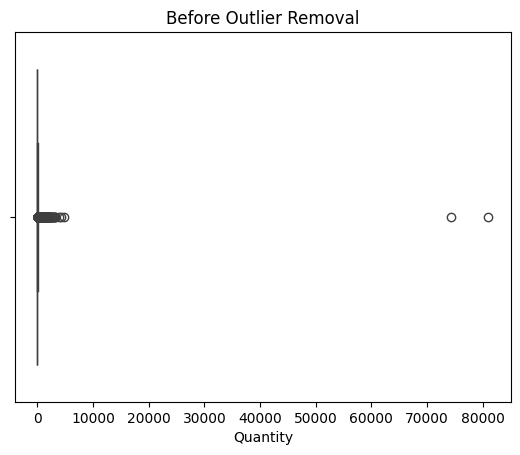

In [24]:
# plotting a box plot to find outliers in Quantity
sns.boxplot(data = df, x = 'Quantity')
plt.title("Before Outlier Removal");

In [25]:
# removing extreme values 
df = df[(df['UnitPrice']<5000) & (df['Quantity']<5000)]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


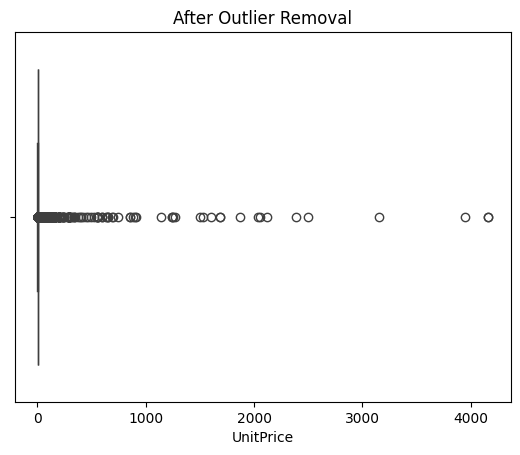

In [26]:
sns.boxplot(data = df, x = 'UnitPrice')
plt.title("After Outlier Removal");

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


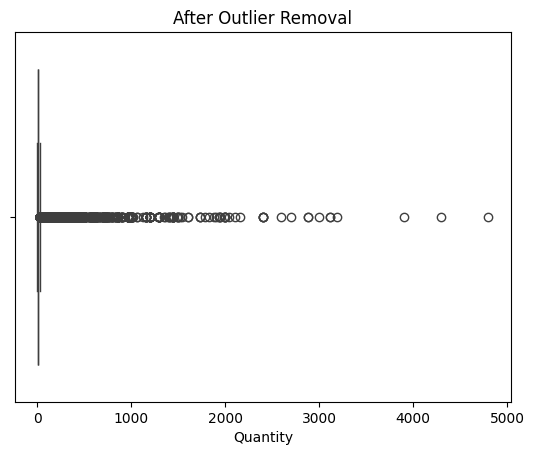

In [27]:
sns.boxplot(data = df, x = 'Quantity')
plt.title("After Outlier Removal");

In [28]:
df.loc[:,'Date']=pd.DatetimeIndex(df['InvoiceDate']).date
df.loc[:,'Time']=pd.DatetimeIndex(df['InvoiceDate']).time

/var/folders/zt/mhtdtw4n2l16fvmxkb0zhs400000gn/T/ipykernel_96206/919211955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'Date']=pd.DatetimeIndex(df['InvoiceDate']).date
/var/folders/zt/mhtdtw4n2l16fvmxkb0zhs400000gn/T/ipykernel_96206/919211955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'Time']=pd.DatetimeIndex(df['InvoiceDate']).time


In [29]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00


# Customers segmentation using RFM

- Tujuan dari segmentasi ini untuk mengelompokkan customer berdasarkan perilaku pembelian customer
- Karena dataset memiliki dimensi yang rendah, serta atribut/fitur nya memungkinkan untuk menggunakan RFM analisis maka kita dapat menggunakan RFM untuk memberikan wawasan mengenai perilaku pembelian customer.

## Calculate RFM Value

Hitung Recency, rumusnya:

Recency = titik waktu observasi - jumlah hari pembelian terakhir

Frequency = Berapa kali Customer melakukan transaksi

Monetary = Total nilai uang yang sudah dikeluarkan pada transaksi

In [30]:
import datetime as dt

In [31]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']  # Create a new column for TotalPrice

# Calculate Recency, Frequency, and Monetary
snapshot_date = max(df['InvoiceDate']) + dt.timedelta(days=1)
rfm_table = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalPrice': 'sum'
})

# Rename columns
rfm_table.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
}, inplace=True)

rfm_table

/var/folders/zt/mhtdtw4n2l16fvmxkb0zhs400000gn/T/ipykernel_96206/247479059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df['Quantity'] * df['UnitPrice']  # Create a new column for TotalPrice


,Recency,Frequency,Monetary
CustomerID,,,
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
12352.0,36,85,2506.04
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,12,178.05


In [32]:
df[['InvoiceDate']].max()

InvoiceDate   2011-12-09 12:50:00
dtype: datetime64[ns]

Kita asumsikan bahwa tanggal sekarang berdasarkan dataset yaitu `2011-12-09`

In [33]:
df[df['CustomerID'] == 12347.0][['InvoiceDate']].max()

InvoiceDate   2011-12-07 15:52:00
dtype: datetime64[ns]

CustomerID `12347.0` terakhir melakukan transaksi yaitu 2 hari lalu `2011-12-07`. 

Maka Recency nya akan bernilai 2

In [34]:
rfm_table[rfm_table.index == 12347.0]

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,2,182,4310.0


**Recency: 2**

Nilai Recency adalah 2, yang berarti pelanggan dengan ID 12347.0 melakukan pembelian relatif baru-baru ini. Skor Recency rendah (1 atau 2) biasanya diinterpretasikan sebagai pelanggan yang lebih aktif atau terakhir kali bertransaksi belum lama.

**Frequency: 182**

Nilai Frequency adalah 182, menunjukkan bahwa pelanggan tersebut telah melakukan pembelian sebanyak 182 kali. Skor Frequency yang tinggi menunjukkan pelanggan yang sering melakukan pembelian, yang dapat dianggap sebagai pelanggan yang setia atau berkomitmen.

**Monetary: 4310.00**

Nilai Monetary adalah 4310.00, yang mencerminkan total uang yang dihabiskan oleh pelanggan tersebut. Skor Monetary yang tinggi menunjukkan pelanggan yang memiliki kontribusi finansial yang signifikan.

In [35]:
# Define RFM Score
rfm_table['R'] = pd.qcut(rfm_table['Recency'], q=4, labels=[4, 3, 2, 1])
rfm_table['F'] = pd.qcut(rfm_table['Frequency'], q=4, labels=[1, 2, 3, 4])
rfm_table['M'] = pd.qcut(rfm_table['Monetary'], q=4, labels=[1, 2, 3, 4])


rfm_table

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12347.0,2,182,4310.00,4,4,4
12348.0,75,31,1797.24,2,2,4
12349.0,19,73,1757.55,3,3,4
12350.0,310,17,334.40,1,1,2
12352.0,36,85,2506.04,3,3,4
...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1
18281.0,181,7,80.82,1,1,1
18282.0,8,12,178.05,4,1,1


- pd.qcut(rfm_table['Recency'], q=4, labels=[4, 3, 2, 1]): Menggunakan fungsi pd.qcut untuk membagi data dalam kolom 'Recency' ke dalam 4 kuartil. Labels [4, 3, 2, 1] diberikan untuk mewakili nilai kuartil.
- pd.qcut(rfm_table['Frequency'], q=4, labels=[1, 2, 3, 4]): Sama seperti di atas, tetapi untuk kolom 'Frequency'.
- pd.qcut(rfm_table['Monetary'], q=4, labels=[1, 2, 3, 4]): Sama seperti di atas, tetapi untuk kolom 'Monetary'.

Hasilnya adalah tiga kolom baru: 'R', 'F', dan 'M', yang masing-masing merepresentasikan kategori kuartil dari Recency, Frequency, dan Monetary.

Pemilihan label pada kolom Recency berbeda karena kita ingin memahami bahwa semakin kecil nilai Recency (yaitu, semakin baru pelanggan melakukan pembelian), semakin baik. Sebagai contoh, kita menggunakan label [4, 3, 2, 1] untuk Recency. 
Jadi semakin kecil nilai Recency maka nilai kolom R akan mendekati 4. 

Contoh :
Nilai Recency = 2 maka nilai kolom R nya akan menjadi 4

<!-- Ini mencerminkan bahwa nilai yang lebih tinggi (lebih dekat ke 4) sebenarnya menunjukkan bahwa pelanggan telah melakukan pembelian baru-baru ini. -->

Sebaliknya, pada kolom Frequency dan Monetary, kita ingin memberi nilai yang lebih tinggi kepada pelanggan yang melakukan pembelian lebih sering dan menghabiskan lebih banyak uang. Oleh karena itu, label [1, 2, 3, 4] digunakan untuk Frequency dan Monetary. Pada kasus ini, nilai yang lebih tinggi (menuju 4) menunjukkan pelanggan yang memiliki tingkat aktivitas dan kontribusi finansial yang lebih tinggi.

In [36]:
# Calculate RFM Score
rfm_table['RFM_Score'] = rfm_table['R'].astype(int) + rfm_table['F'].astype(int) + rfm_table['M'].astype(int)
rfm_table

,Recency,Frequency,Monetary,R,F,M,RFM_Score
CustomerID,,,,,,,
12347.0,2,182,4310.00,4,4,4,12
12348.0,75,31,1797.24,2,2,4,8
12349.0,19,73,1757.55,3,3,4,10
12350.0,310,17,334.40,1,1,2,4
12352.0,36,85,2506.04,3,3,4,10
...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,3
18281.0,181,7,80.82,1,1,1,3
18282.0,8,12,178.05,4,1,1,6


In [43]:
# Add label based on RFM Score
rfm_table['Label'] = 'Bronze'
rfm_table.loc[(rfm_table['RFM_Score'] >= 6) & (rfm_table['RFM_Score'] <= 8), 'Label'] = 'Silver'
rfm_table.loc[(rfm_table['RFM_Score'] >= 9) & (rfm_table['RFM_Score'] <= 11), 'Label'] = 'Gold'
rfm_table.loc[(rfm_table['RFM_Score'] >= 12) & (rfm_table['RFM_Score'] <= 14), 'Label'] = 'Platinum'
rfm_table.loc[rfm_table['RFM_Score'] >= 15, 'Label'] = 'Diamond'


rfm_table.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Score,Label
0,12347.0,2,182,4310.00,4,4,4,12,Platinum
1,12348.0,75,31,1797.24,2,2,4,8,Silver
2,12349.0,19,73,1757.55,3,3,4,10,Gold
3,12350.0,310,17,334.40,1,1,2,4,Bronze
4,12352.0,36,85,2506.04,3,3,4,10,Gold


/var/folders/zt/mhtdtw4n2l16fvmxkb0zhs400000gn/T/ipykernel_96206/3904788668.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=rfm_table, palette=sns.color_palette("viridis", n_colors=len(rfm_table['Label'].unique())))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead o

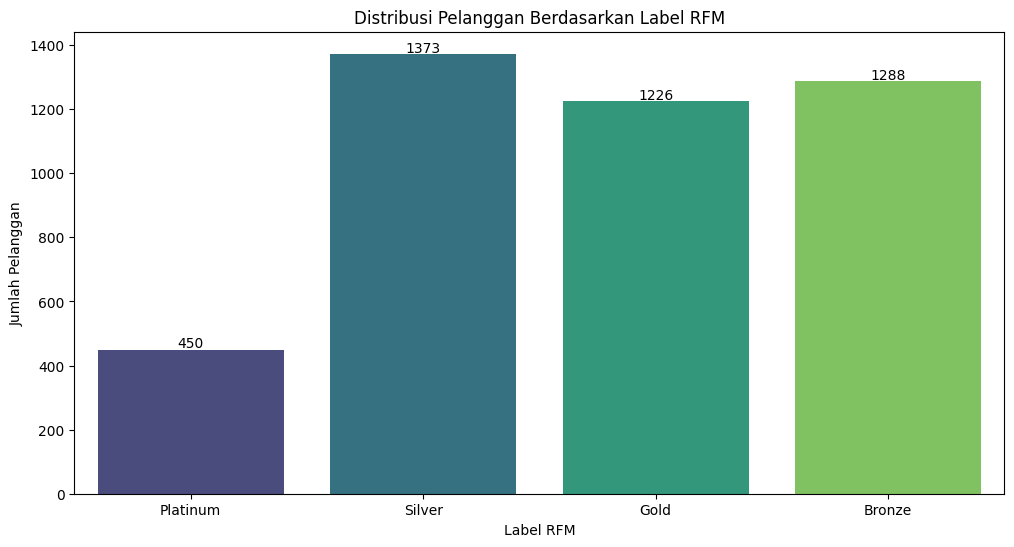

In [47]:
# Visualisasi Bar Plot
plt.figure(figsize=(12, 6))
sns.countplot(x='Label', data=rfm_table, palette=sns.color_palette("viridis", n_colors=len(rfm_table['Label'].unique())))

# Tambahkan label pada setiap bar
for p in plt.gca().patches:
    plt.gca().annotate(f'\n{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribusi Pelanggan Berdasarkan Label RFM')
plt.xlabel('Label RFM')
plt.ylabel('Jumlah Pelanggan')
plt.show()

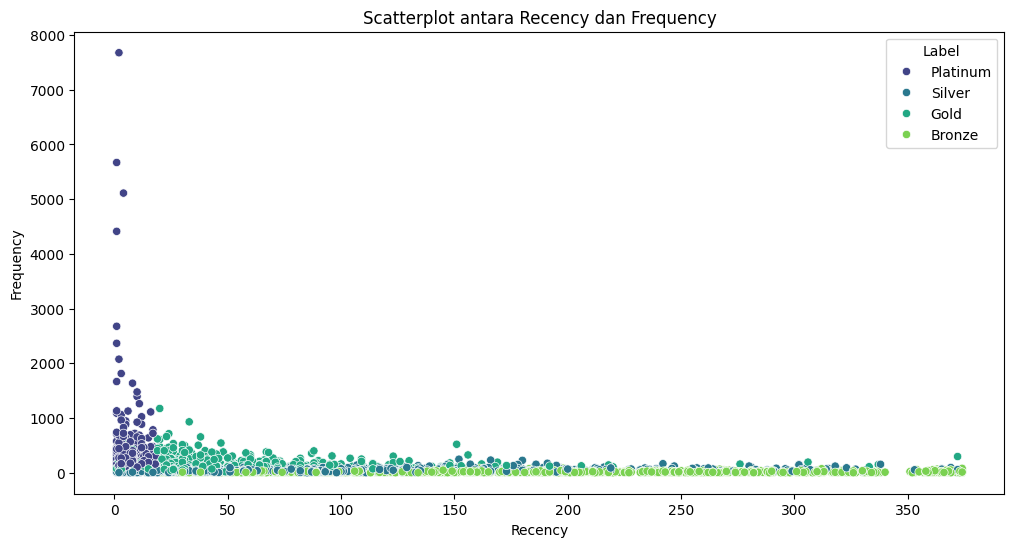

In [55]:
# Scatterplot antara Recency dan Frequency dengan legend Label
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Recency', y='Frequency', hue='Label', data=rfm_table, palette='viridis')
plt.title('Scatterplot antara Recency dan Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend(title='Label')
plt.show()

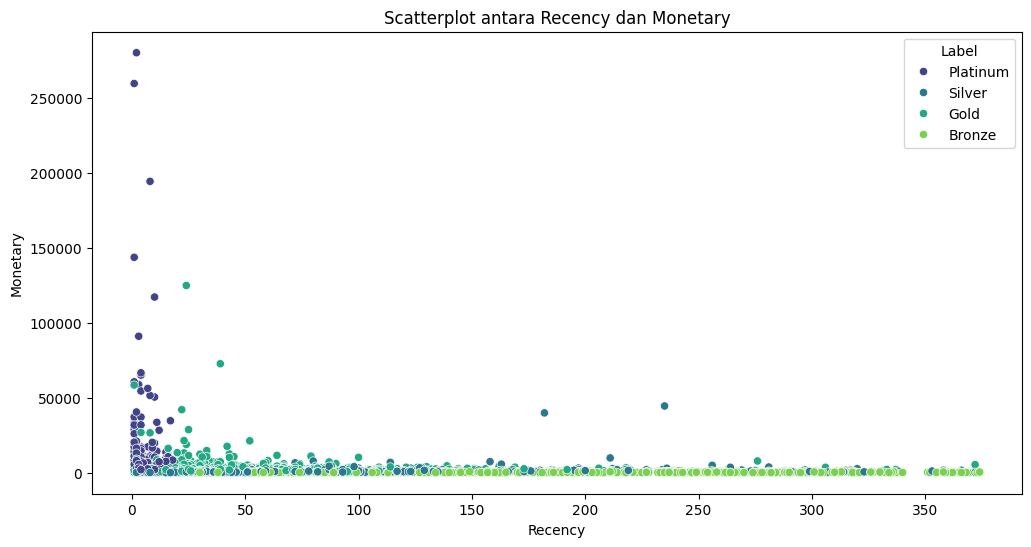

In [56]:
# Scatterplot antara Recency dan Monetary dengan legend Label
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Recency', y='Monetary', hue='Label', data=rfm_table, palette='viridis')
plt.title('Scatterplot antara Recency dan Monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.legend(title='Label')
plt.show()

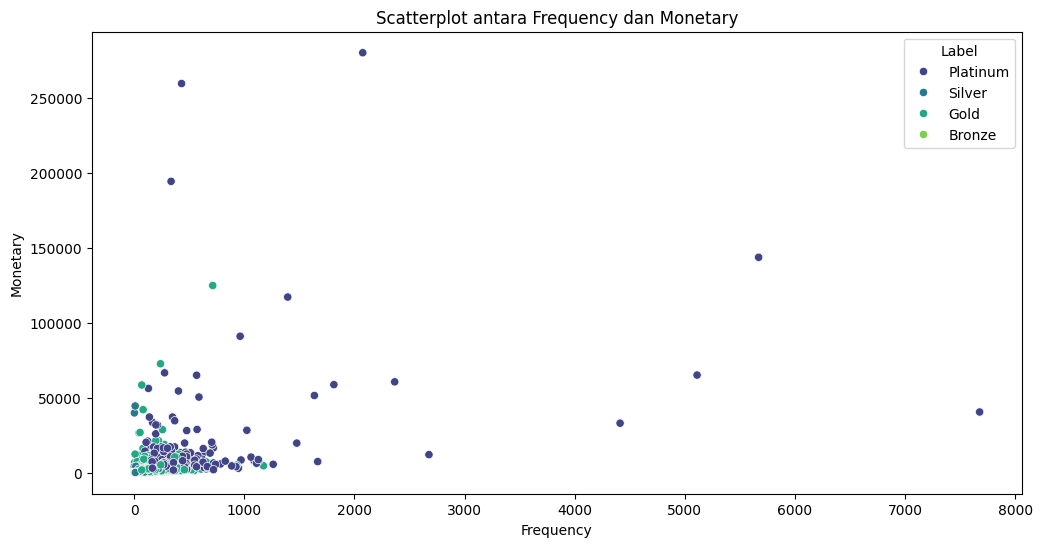

In [57]:
# Scatterplot antara Frequency dan Monetary dengan legend Label
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Frequency', y='Monetary', hue='Label', data=rfm_table, palette='viridis')
plt.title('Scatterplot antara Frequency dan Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.legend(title='Label')
plt.show()